# 基于CLIP_ViT模型搭建相似图像检索系统

来自b站up主deep_thoughts 合集【PyTorch源码教程与前沿人工智能算法复现讲解】

P_59_基于CLIP_ViT模型搭建相似图像检索系统：

https://www.bilibili.com/video/BV1BB4y1a76V/?spm_id_from=333.788&vd_source=18e91d849da09d846f771c89a366ed40

***论文***

Learning Transferable Visual Models From Natural Language Supervision:

https://arxiv.org/pdf/2103.00020.pdf

***代码***

CLIP:

https://github.com/openai/CLIP


***数据集***

果蔬图像识别：

https://aistudio.baidu.com/aistudio/datasetdetail/119023/0

## 被检索图像处理

此项目基于ResNet18果蔬分类，具体见 /ResNet/【deep_thoughts】51_基于PyTorch_ResNet18的果蔬分类逐行代码讲解.ipynb

处理代码为：

/CLIP/fruit_and_vegetable_data/split_dataset.py

/CLIP/fruit_and_vegetable_data/statistic_mean_std.py

## 安装CLIP

In [6]:
!pip install ftfy regex tqdm

!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to c:\users\nxyqd\appdata\local\temp\pip-req-build-7qpt01nx
  Resolved https://github.com/openai/CLIP.git to commit d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369476 sha256=0236e89f8374ba2e05756a020c3d972895d2322751a962ea5ff98863515b0fca
  Stored in directory: C:\Users\nxyqd\AppData\Local\Temp\pip-ephem-wheel-cache-3tmo1lmo\wheels\fd\b9\c3\5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


  Running command git clone -q https://github.com/openai/CLIP.git 'C:\Users\nxyqd\AppData\Local\Temp\pip-req-build-7qpt01nx'


## CLIP/ResNet 图像表征提取

In [12]:
%run ./fruit_and_vegetable_data/image_search_engine.py --model_name=clip

use pretrained model clip to extract features


100%|█████████████████████████████████████████████████████████████████████████████| 3376/3376 [00:30<00:00, 110.58it/s]


In [10]:
%run ./fruit_and_vegetable_data/image_search_engine.py --model_name=resnet50

number of trainable params (M): 25.56
use pretrained model resnet50 to extract features


100%|██████████████████████████████████████████████████████████████████████████████| 3376/3376 [02:18<00:00, 24.41it/s]


## 图像检索效果演示

use pretrained model clip to search 7 similar images from corpus


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.68it/s]

reading ./fruit_and_vegetable_data/test_image\apple.jpeg...



100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1007.04it/s]


sorting most similar images as ./fruit_and_vegetable_data/test_image\apple.jpeg...
starting to show similar images...


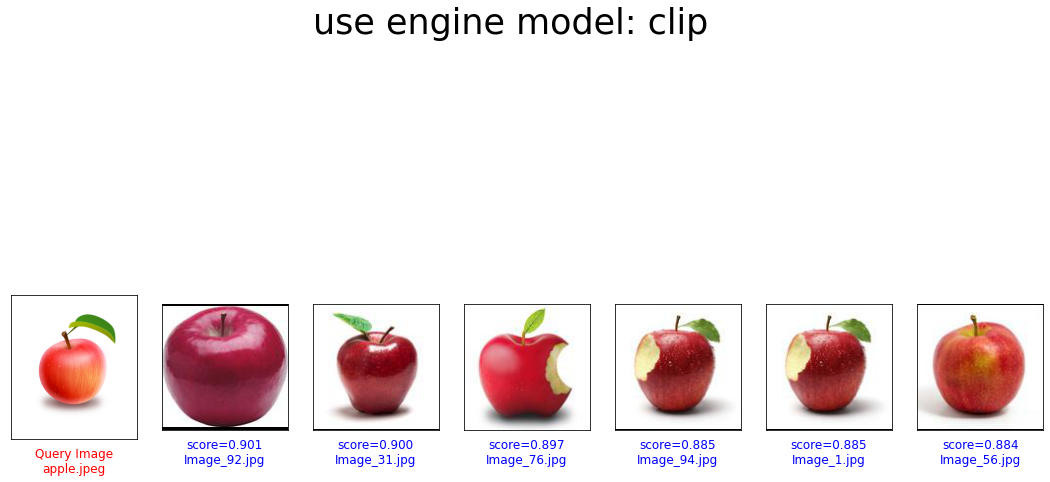

In [13]:
%run ./fruit_and_vegetable_data/image_search_engine.py --model_name=clip --mode=predict

number of trainable params (M): 25.56
use pretrained model resnet50 to search 7 similar images from corpus


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.41it/s]

reading ./fruit_and_vegetable_data/test_image\apple.jpeg...



100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 998.64it/s]

sorting most similar images as ./fruit_and_vegetable_data/test_image\apple.jpeg...
starting to show similar images...


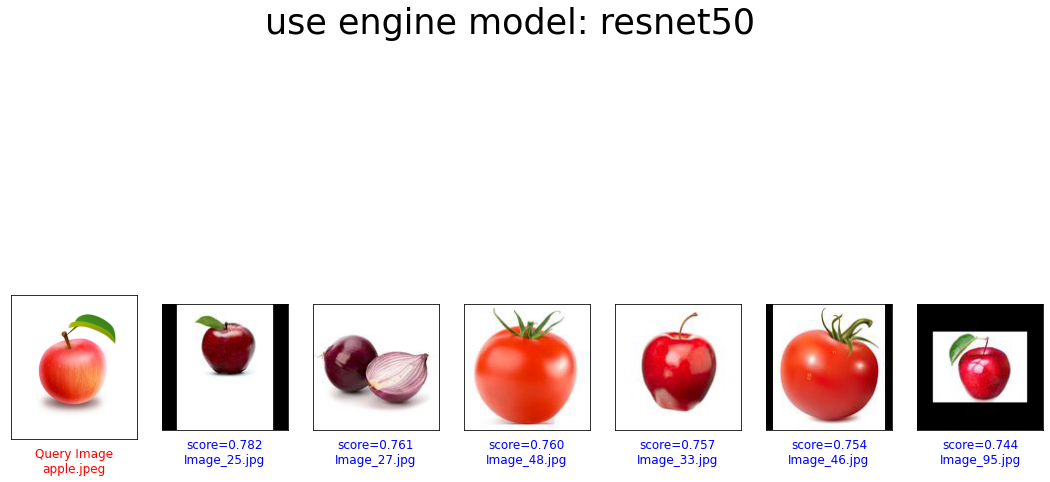

In [14]:
%run ./fruit_and_vegetable_data/image_search_engine.py --model_name=resnet50 --mode=predict

## 余弦相似度批量计算及排序

def getSimilarityMatrix(vectors_dict)

## 画图展示检索结果

def plotSimilarImages(args, image, simImages, simValues, numRow=1, numCol=4)